In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as ss

import pingouin

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

import pylab as py 

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(10,5)}
)

In [3]:
df1 = pd.read_csv("5_task_1.csv")
df2 = pd.read_csv("5_task_2.csv")

In [4]:
# На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. 
# К вам пришел коллега с результатами двух тестов:

# В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, 
# либо новые квадратные 

# Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
# Коллега пришел к вам с просьбой: он посмотрел на графики и предположил,
# что среди групп могут встретиться различия. 
# Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе 
# статистических тестов и принять решения.



# task_1
# id – id клиента в эксперименте
# group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
# events – сколько блюд суммарно было заказано за период


# task_2
# id – id клиента в эксперименте
# segment – сегмент (high/low)
# group – вид кнопки (control – старая версия, test – новая версия)
# events – сколько блюд суммарно было заказано за период

In [5]:
# Задача 1

# Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, 
# т.е. в какой из групп в среднем покупали больше всего.
# Всего пользователям показывались три варианта:

In [6]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
df1.shape

(30000, 3)

In [8]:
# 
df1.groupby("group", as_index=False).agg({'events':'sum'}).sort_values("events", ascending=False)

,group,events
1,B,376136
0,A,295796
2,C,274703


In [9]:
# в среднем покупали больше всего из группы B

df1.groupby("group", as_index=False).agg({'events':'mean'}).sort_values("events", ascending=False)

,group,events
1,B,37.6136
0,A,29.5796
2,C,27.4703


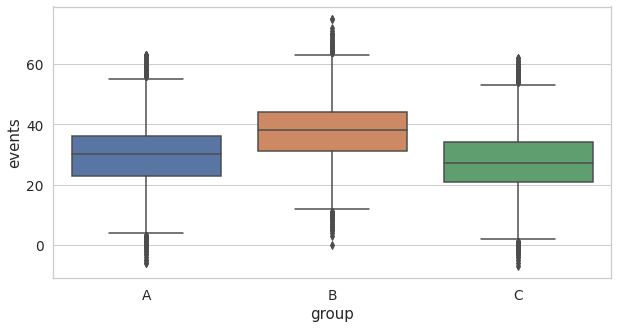

In [10]:
sns.boxplot(data=df1, x='group', y='events')

In [11]:
group_A = df1.query("group == 'A'")
group_B = df1.query("group == 'B'")
group_C = df1.query("group == 'C'")

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

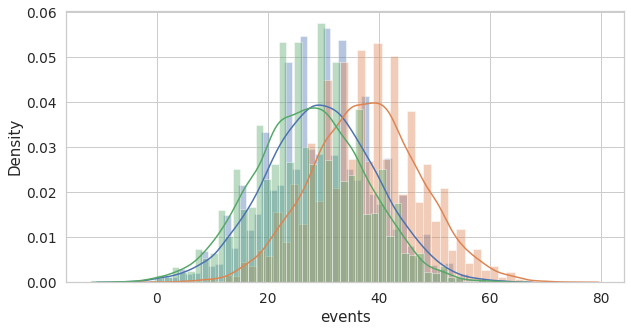

In [12]:
sns.distplot(group_A.events)
sns.distplot(group_B.events)
sns.distplot(group_C.events)

In [13]:
from scipy import stats 
stats.f_oneway(group_A.events, group_B.events, group_C.events) # a, b, c - переменные с данными трёх групп

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [14]:
def ssb(A,B,C):
    group = (A,B,C)
    result = 0
    for m in range(len((A,B,C))):
        n = len(A)
        result += n * (np.mean(group[m])-np.mean(np.concatenate([A, B, C])))**2
    return result

SSB = ssb(group_A.events, group_B.events, group_C.events)
SSB

572936.1245999996

In [15]:
def ssw(*groups):
    result = 0
    for m in range(len(groups)):
        try:
            summa = sum((groups[m]-np.mean(groups[m]))**2)
            result += summa
        except:
            continue
    return result
SSW = ssw(group_A.events, group_B.events, group_C.events)
SSW

2977368.76789999

In [16]:
N = 3*len(group_A)-1
m = 3

F = (SSB / (m-1)) / (SSW / (N-m))
F

2886.070442262203

In [17]:
print('SSW', SSW)
print('SSB', SSB)

SSW 2977368.76789999
SSB 572936.1245999996


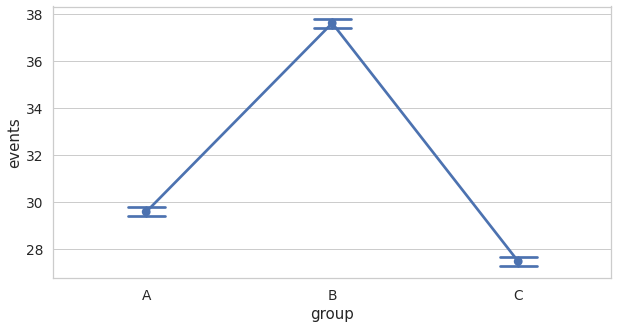

In [18]:
sns.pointplot(x="group", y="events", data=df1, capsize=0.2)

In [19]:
x_bar = group_A.events.mean()
x_bar

29.5796

In [20]:
len(group_A)

10000

In [21]:
x_bar - 1.67

27.909599999999998

In [22]:
group_A

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
9995,5603,A,25
9996,18188,A,25
9997,16354,A,30
9998,27737,A,21


In [23]:
import scipy.stats as stats
group1 = group_A.events
group2 = group_B.events
group3 = group_C.events

mean = np.mean(group1)

std_dev = stats.tstd(group1)

df = len(group_A) - 1

# margin_of_error = stats.t.ppf(0.975, df=degrees_of_freedom) * (std_dev / (len(data) ** 0.5))
margin_of_error = stats.t.ppf(0.95, df=df) * std_dev

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print("95% Confidence Interval:", (lower_bound, upper_bound))

95% Confidence Interval: (12.998965449867605, 46.160234550132394)


In [24]:
stats.t.ppf(0.95, df=df)

1.6450060333112988

In [25]:
std_dev

10.079376132594826

In [26]:
stats.t.ppf(0.95, df=df)

1.6450060333112988

In [27]:
#############################################################################

In [28]:
# Zadanie 4


# Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

# Hint: scipy.stats.levene либо pingouin.homoscedasticity

In [29]:
print(scipy.stats.levene(group1, group2, group3))

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)


In [30]:
pingouin.homoscedasticity(data=df1, group='group', dv='events')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [31]:
# Zadanie 5


# Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

# Дополнительно: сравните  результат с qq-графиками. 
# Какой вывод можно сделать по совокупности этих методов?

In [32]:
scipy.stats.normaltest(group1)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [33]:
scipy.stats.normaltest(group2)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [34]:
scipy.stats.normaltest(group3)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

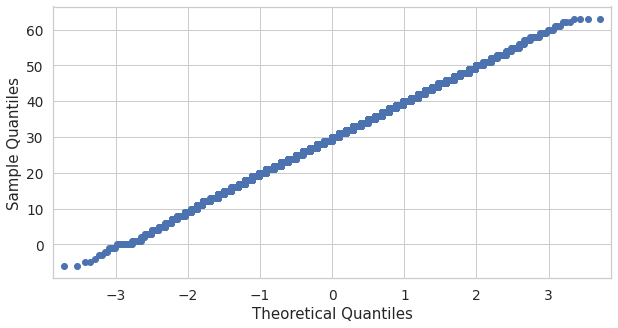

In [35]:
sm.qqplot(group1) 
py.show()

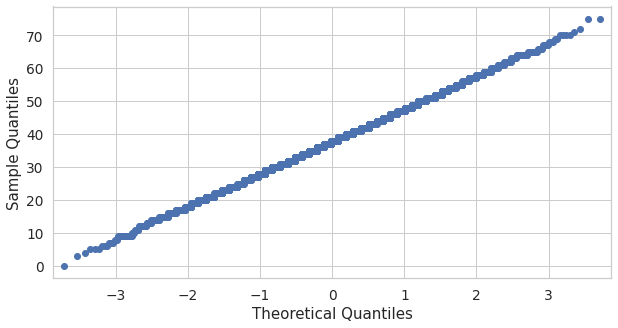

In [36]:
sm.qqplot(group2) 
py.show()

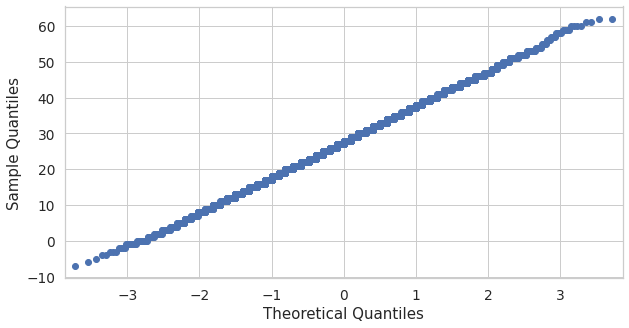

In [37]:
sm.qqplot(group3) 
py.show()

In [38]:
# Zadanie 5

# Самое время провести тест! 

In [39]:
# Для сравнения средних я использую 
# ВЫБРАТЬ
# . Значение статистики равно (окр. до целого) 
# ВЫБРАТЬ
# , а р-уровень значимости составил 
# ВЫБРАТЬ
# .

In [40]:
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [41]:
# task_1
# id – id клиента в эксперименте
# group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
# events – сколько блюд суммарно было заказано за период

In [42]:
# id – идентификатор клиента в эксперименте (независимая переменная).
# group – тип разрешения, в котором показывались картинки (независимая переменная).
# events – количество заказанных блюд за период (зависимая переменная).
# Если вы хотите сравнить средние значения количества заказанных блюд между разными 
# группами (разрешениями картинок), то зависимая переменная будет events, 
# а независимые переменные будут id и group. 
# Вы будете анализировать, как тип разрешения картинок (группа) влияет на количество заказанных блюд (событий).

In [43]:
from scipy import stats 
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [44]:
# Zadanie 6

# Теперь используйте критерий Тьюки и определите, 
# между какими группами есть статистически значимые различия. 

# Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin.
# Дают ли они те же выводы, что и Тьюки?

In [45]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, 
                                         MultiComparison
                                        )

In [46]:
# print(pairwise_tukeyhsd(столбец_с_данными, столбец_с_обозначениями_групп))
# или
# MultiComp = MultiComparison(столбец_с_данными, столбец_с_обозначениями_групп)
# print(MultiComp.tukeyhsd().summary())

print(pairwise_tukeyhsd(df1.events, df1.group))

# Tukey nam dal takoi resulttat chto mejdu nimi est statisticheskie razlichie

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [47]:
group1.mean() - group2.mean()

-8.033999999999999

In [48]:
group3.mean() - group1.mean()

-2.1092999999999975

In [49]:
pg.pairwise_tukey(data=df1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [50]:
# U vseh est statisticheskie razlichie

In [51]:
# Zadanie 7

# Так какие картинки в итоге будем использовать?

In [52]:
# Otvet: B – Квадратные

In [53]:
############################################################################################################

In [54]:
# Zadanie 8

# Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата 
# кнопки оформления заказа, с разбивкой по сегменту клиента.

# Какой метод скорее всего пригодится в данном случае?

In [55]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


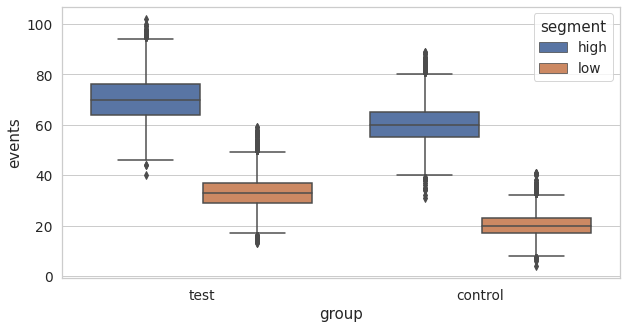

In [56]:
sns.boxplot(data=df2, x='group', y='events', hue='segment')

In [57]:
# Otvet: многофакторный дисперсионный анализ

In [58]:
# Zadanie 9

# Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. 
# Соотнесите графики распределения и экспериментальные группы:

In [59]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(15,7)}
)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


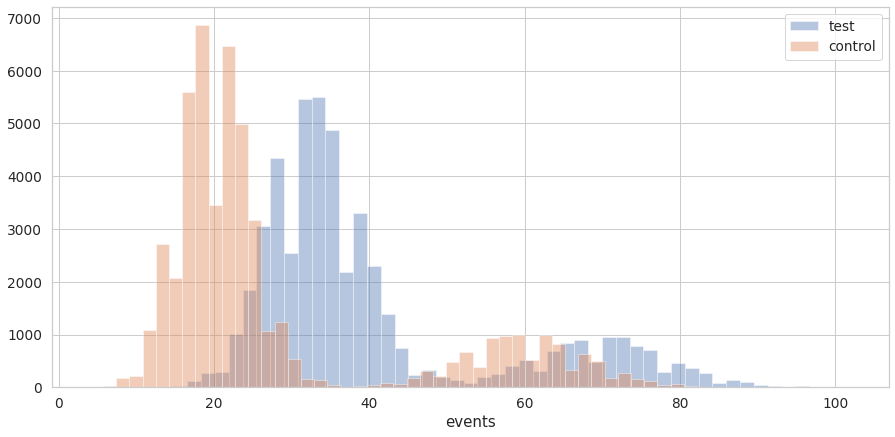

In [60]:
sns.distplot(df2.query("group == 'test' ").events, kde=False, label='test')
sns.distplot(df2.query("group == 'control'").events, kde=False, label='control')
plt.legend()

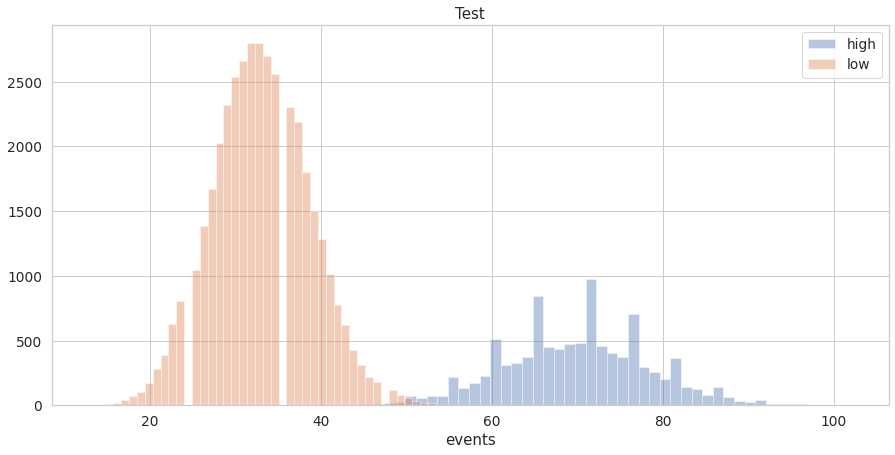

In [61]:
sns.distplot(df2.query("group == 'test' & segment == 'high'").events, kde=False, label='high')
sns.distplot(df2.query("group == 'test' & segment == 'low'").events, kde=False, label='low')
# sns.distplot(df2.query("group == 'control'").events, kde=False, label='control')
plt.title("Test")
plt.legend()

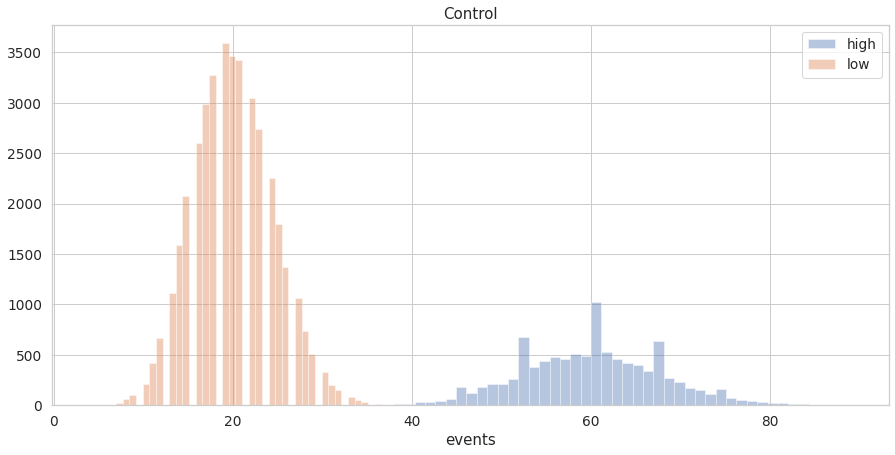

In [62]:
sns.distplot(df2.query("group == 'control' & segment == 'high'").events, kde=False, label='high')
sns.distplot(df2.query("group == 'control' & segment == 'low'").events, kde=False, label='low')
# sns.distplot(df2.query("group == 'control'").events, kde=False, label='control')
plt.title("Control")
plt.legend()

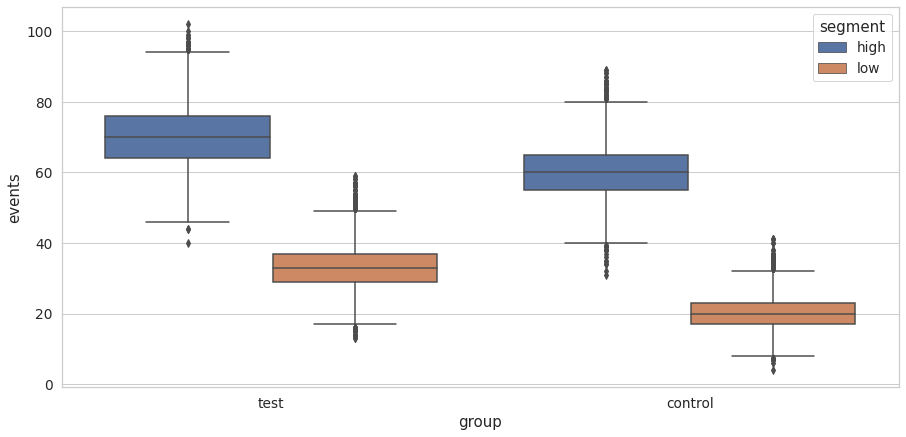

In [63]:
sns.boxplot(data=df2, x='group', y='events', hue='segment')

In [64]:
# Zadanie 10

# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

# В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, 
# с точностью до 2 знаков после точки.

In [65]:
df2.groupby(['group','segment'], as_index=False).agg({"events":"mean"}).rename(columns={"events":"mean"})

,group,segment,mean
0,control,high,59.970800
1,control,low,20.031575
2,test,high,69.938500
3,test,low,33.025925


In [66]:
df2.groupby(['group','segment'], as_index=False).agg({"events":"median"}).rename(columns={"events":"median"})

,group,segment,median
0,control,high,60.0
1,control,low,20.0
2,test,high,70.0
3,test,low,33.0


In [67]:
df2.groupby(['group','segment'], as_index=False).agg({"events":"std"}).rename(columns={"events":"std"})

,group,segment,std
0,control,high,7.805347
1,control,low,4.473576
2,test,high,8.403974
3,test,low,5.720845


In [68]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [70]:
# Zadanie

# Почти у цели – осталось выбрать формулу для модели. 
# Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, 
# с взаимодействием факторов.

# Если вы прибегнете к statsmodels, то какую формулу используете?



# Otvet: events ~ segment + group + segment:group

In [71]:
# Проведите тест (через anova_lm либо pg.anova), 
# а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.


# В данном случае для последующих сравнений между группами можно проделать следующую операцию: 
# соединить колонки group и segment в combination, чтобы потом передать в аргумент groups 
# в MultiComparison либо pairwise_tukey:

In [72]:
# Между какими группами были обнаружены статистически значимые различия? 
# Выберите верные утверждения:

# Note:  При интерпретации обратите внимание на то, какая из групп 
# с какой сравнивается и как считается meandiff.

In [73]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [74]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [76]:
formula = 'events ~ group + segment + group:segment'
model = ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [77]:
aov_table

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [78]:
pg.anova(data=df2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [79]:
df2['comparison'] = df2['group'] + ' / ' + df2['segment']
df2

,id,group,segment,events,comparison
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low


In [80]:
MultiComp = MultiComparison(df2.events, df2.comparison)

In [81]:
MultiComp

In [83]:
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


In [86]:
df2.query("comparison == 'control / high'").events.mean()\
    - df2.query("comparison == 'control / low'").events.mean()

39.93922499999999

In [87]:
###########################################################################

In [88]:
# Визуализируйте результаты теста и заполните пропуски:

In [ ]:
sns.pointplot()

In [89]:
# Фактор group оказался 
# ЗНАЧИМЫМ
# , фактор segment – 
# ЗНАЧИМЫМ
# , их взаимодействие –
# ЗНАЧИМО
# . Судя по графику, для всех групп среднее значение events 
# УВЕЛИЧИЛОСЬ
# , поэтому решение: 
# ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ
# .